In [1]:
import pandas as pd 
data = pd.read_csv('textdata.csv', index_col=0)

In [2]:
data.head(2)

,text
taylor swift,Welcome to r/Fauxmoi (previously r/Deuxmoi) !...
timothee chalamet,"Well, judging by the what you say I hope you'..."


In [3]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import re
nlp = spacy.load('en_core_web_sm')

In [4]:
new_stopwords = data.index 
new_stopwords = [item.lower().split() for item in new_stopwords]
new_stopwords = [word for sublist in new_stopwords for word in sublist]
new_stopwords.extend([word + "'s" for word in new_stopwords])
STOP_WORDS |= set(new_stopwords)

In [5]:
def clean_comments(comments):
    # Remove unwanted text
    comments = re.sub(r'http\S+', '', comments) # Remove URLs
    comments = re.sub(r'\w*\d\w*', '', comments) # Remove words containing digits
    comments = re.sub(r'[^\x00-\x7F]+', '', comments) # Remove non-ASCII characters
    comments = re.sub(r'(/|\br/)\S*', '', comments) # for reddit syntax 
    comments = re.sub(r'[^\w\s]', '', comments) # Remove punctuation
    comments = re.sub(r'[\n\t\r]', ' ', comments) # Replace newlines, tabs, and carriage returns with a single space
    # Replace multiple spaces with a single space
    comments = re.sub(r' +', ' ', comments).strip()
    # Lowercase text
    comments = comments.lower() 
    # Remove stop words and lemmatize
    comments = " ".join([word.lemma_ for word in nlp(comments) if not word.is_stop]) 
    return comments

In [6]:
data['cleaned_text'] = data.text.apply(clean_comments)

In [7]:
data.text.apply(lambda x: len(x))

taylor swift         342819
timothee chalamet    537824
harry styles         311704
rihanna              574202
billie eilish        422176
selena gomez         291640
lady gaga            650517
pedro pascal         497283
elon mask            550617
leonardo dicaprio    597293
prince harry         342719
kylie jenner         229698
emma watson          414382
chris evans          263697
emilia clarke        272848
cole sprouse         217688
doja cat             225724
cristiano ronaldo    277157
johnny depp          332393
will smith           371817
jenna ortega         199058
bella hadid          317100
Name: text, dtype: int64

In [8]:
data.cleaned_text.apply(lambda x: len(x))

taylor swift         165033
timothee chalamet    277711
harry styles         154239
rihanna              285360
billie eilish        207910
selena gomez         146814
lady gaga            321055
pedro pascal         247558
elon mask            282676
leonardo dicaprio    291856
prince harry         166046
kylie jenner         112431
emma watson          206086
chris evans          133520
emilia clarke        138475
cole sprouse         110364
doja cat             109238
cristiano ronaldo    141563
johnny depp          162209
will smith           181145
jenna ortega         100619
bella hadid          164163
Name: cleaned_text, dtype: int64

In [9]:
from textblob import TextBlob
def getsubjectivity(sitetext):
    return TextBlob(sitetext).sentiment.subjectivity
def getpolarity(sitetext):
    return TextBlob(sitetext).sentiment.polarity

In [10]:
data['subjectivity'] = data['cleaned_text'].apply(getsubjectivity)
data['polarity'] = data['cleaned_text'].apply(getpolarity)

In [11]:
data['gender'] = 'female'
data.loc[['timothee chalamet', 'harry styles', 'pedro pascal','elon mask', 'leonardo dicaprio', 
          'prince harry','chris evans','cole sprouse','cristiano ronaldo', 'johnny depp', 'will smith'],'gender'] = 'male'

In [15]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['font.size'] = 10

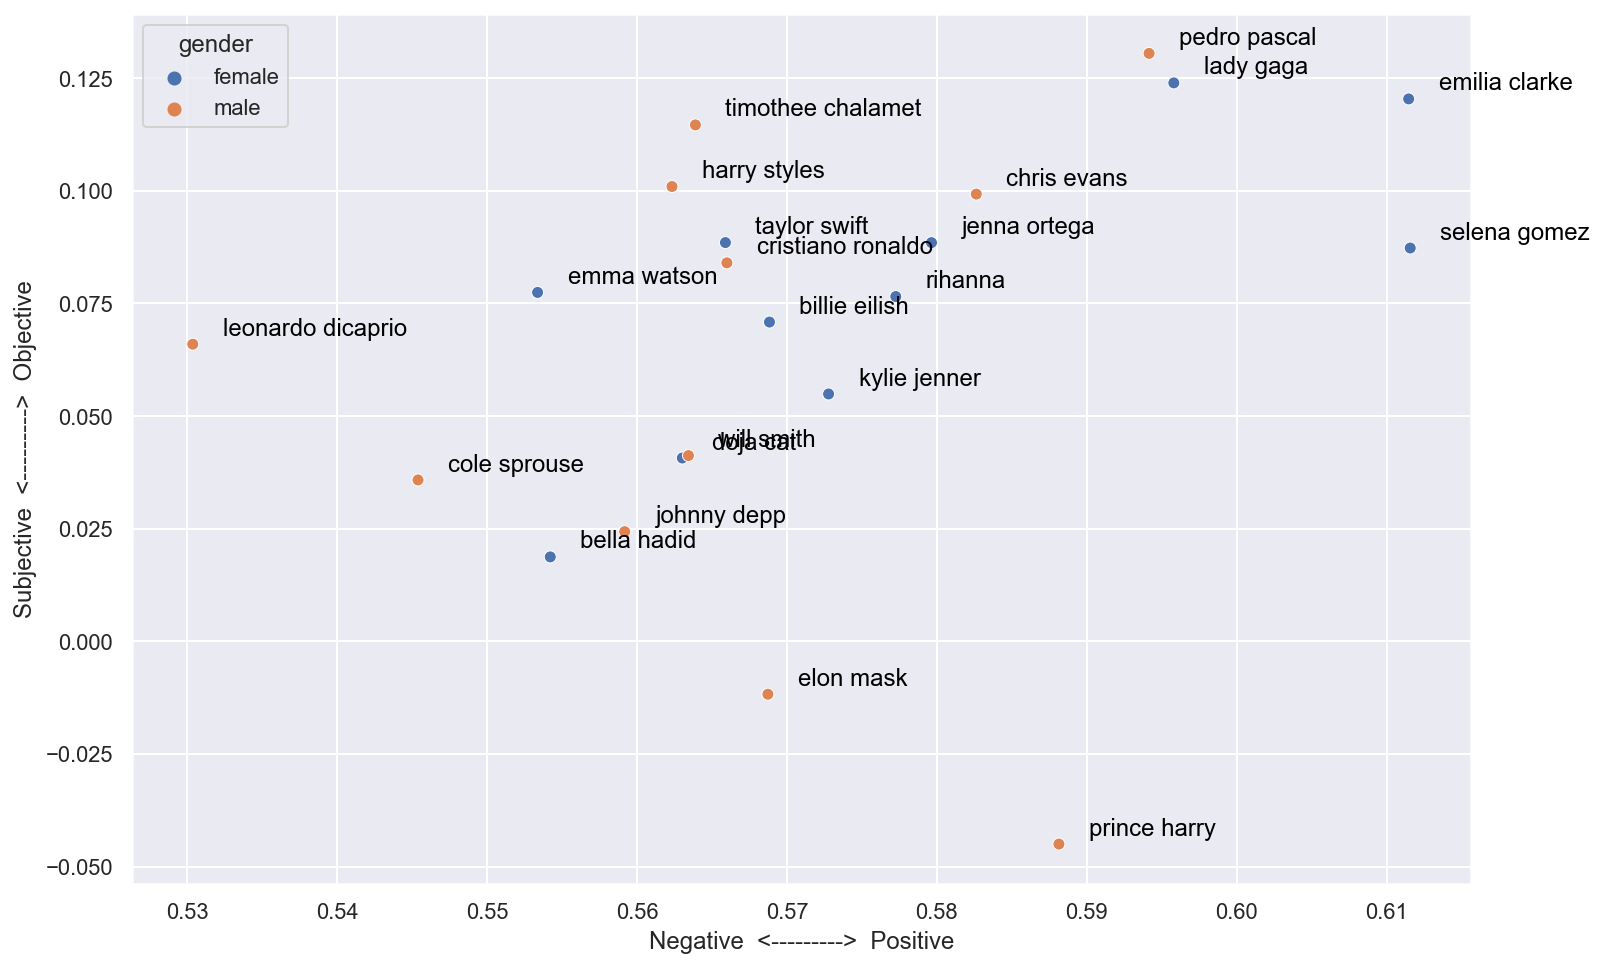

In [16]:
import seaborn as sns 
sns.set()
sns.scatterplot(data = data, x = 'subjectivity', y = 'polarity', hue='gender')
plt.xlabel('Negative  <--------->  Positive')
plt.ylabel('Subjective  <--------->  Objective')
plt.title('')
for index in data.index:
     plt.text(data.subjectivity.loc[index] +0.002, data.polarity.loc[index] +0.002, index, horizontalalignment='left', size='medium', color='black')

In [17]:
def get_adjectives(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if token.pos_ == 'ADJ'])
def get_nouns(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if token.pos_ == 'NOUN'])

In [18]:
data['adjectives'] = data.cleaned_text.apply(get_adjectives)
data['nouns'] = data.cleaned_text.apply(get_nouns)

In [19]:
from collections import Counter

In [50]:
def popular_words(text, popularity):
    adjectives = text.split()
    count_words = Counter(adjectives).most_common(popularity)
    return {word for word, _ in count_words}

In [53]:
popular_adj = data.adjectives.apply(lambda x: popular_words(x, popularity = 10))

In [56]:
popular_adj.values

array([{'great', 'real', 'bad', 'new', 'big', 'good', 'sexist', 'sure', 'public', 'old'},
       {'great', 'hard', 'bad', 'different', 'big', 'good', 'young', 'attractive', 'super', 'old'},
       {'great', 'black', 'bad', 'new', 'big', 'good', 'gay', 'sure', 'delete', 'old'},
       {'great', 'bad', 'live', 'half', 'big', 'pregnant', 'good', 'mic', 'vocal', 'super'},
       {'different', 'bad', 'big', 'good', 'young', 'right', 'famous', 'weird', 'delete', 'old'},
       {'fat', 'bad', 'hot', 'big', 'implant', 'good', 'attractive', 'beautiful', 'fake', 'old'},
       {'great', 'talented', 'bad', 'big', 'good', 'famous', 'rich', 'wrong', 'right', 'high'},
       {'great', 'different', 'bad', 'hot', 'nice', 'big', 'political', 'good', 'right', 'old'},
       {'ill', 'human', 'real', 'bad', 'good', 'rich', 'mental', 'right', 'weird', 'old'},
       {'bad', 'creepy', 'good', 'young', 'famous', 'rich', 'weird', 'sure', 'legal', 'old'},
       {'sorry', 'royal', 'bad', 'privileged', 'live', 

In [21]:
future_adj_stopwords = set.intersection(*map(popular_words, data.adjectives))
future_noun_stopwords = set.intersection(*map(popular_words, data.nouns))

In [22]:
print(f'Common adjectives for men and women: {future_adj_stopwords}')

Common adjectives for men and women: {'bad', 'stupid', 'actual', 'straight', 'famous', 'curious', 'free', 'similar', 'short', 'aware', 'common', 'single', 'multiple', 'young', 'insane', 'medium', 'random', 'likely', 'second', 'cool', 'possible', 'ill', 'important', 'right', 'regular', 'high', 'female', 'different', 'able', 'good', 'easy', 'complete', 'poor', 'negative', 'reddit', 'public', 'long', 'real', 'big', 'personal', 'angry', 'plenty', 'fit', 'perfect', 'glad', 'fair', 'obvious', 'low', 'late', 'huge', 'deep', 'sorry', 'nice', 'terrible', 'rich', 'current', 'crazy', 'certain', 'sure', 'sad', 'delete', 'happy', 'live', 'original', 'dumb', 'correct', 'fucking', 'wrong', 'mean', 'amazing', 'old', 'great', 'close', 'clear', 'entire', 'small', 'black', 'open', 'funny', 'early', 'weird', 'little', 'human', 'honest', 'social', 'hard', 'new', 'true', 'fine'}


In [23]:
print(f'Common nouns for men and women: {future_noun_stopwords}')

Common nouns for men and women: {'hand', 'remove', 'd', 'bit', 'life', 'hate', 'person', 'call', 'end', 'week', 'care', 'friend', 'need', 'level', 'idea', 'dude', 'sound', 'rule', 'celebrity', 'statement', 'way', 'reason', 'tell', 'man', 'lot', 'example', 'help', 'problem', 'love', 'use', 'change', 'look', 'act', 'sense', 'day', 'mind', 'deal', 'head', 'point', 'thread', 'shit', 'check', 'guy', 'stop', 'world', 'base', 'work', 'cause', 'case', 'type', 'stuff', 'term', 'people', 'comment', 'thing', 'fact', 'question', 'break', 'age', 'opinion', 's', 'year', 'child', 'today', 'job', 'place', 'course', 'line', 'start', 'difference', 'rest', 'issue', 'woman', 'time', 'story', 'bunch', 'idk', 'face', 'watch', 'month', 'ass', 'support', 'post', 'word', 'talk', 'fuck', 'chance'}


In [24]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(future_adj_stopwords)
stopwords.update(future_noun_stopwords)

In [25]:
def generate_wordcloud(column_name):
    fig = plt.figure(figsize=(10,8))
    n_ax = 1
    for gender in data.gender.unique():
        plt.subplot(1, 2, n_ax)
        wordcloud = WordCloud(stopwords = stopwords, max_words=50, background_color="white", colormap = 'ocean')\
        .generate(" ".join(data[data.gender == gender][column_name].values))
        plt.title(gender)
        plt.imshow(wordcloud)
        plt.axis("off")
        n_ax = n_ax + 1
    plt.tight_layout()
    plt.show()

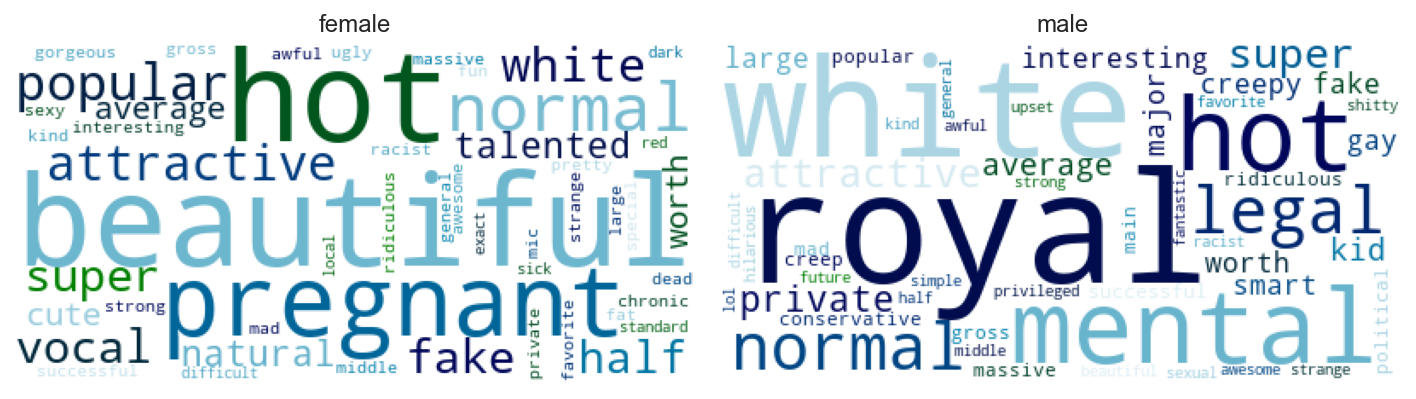

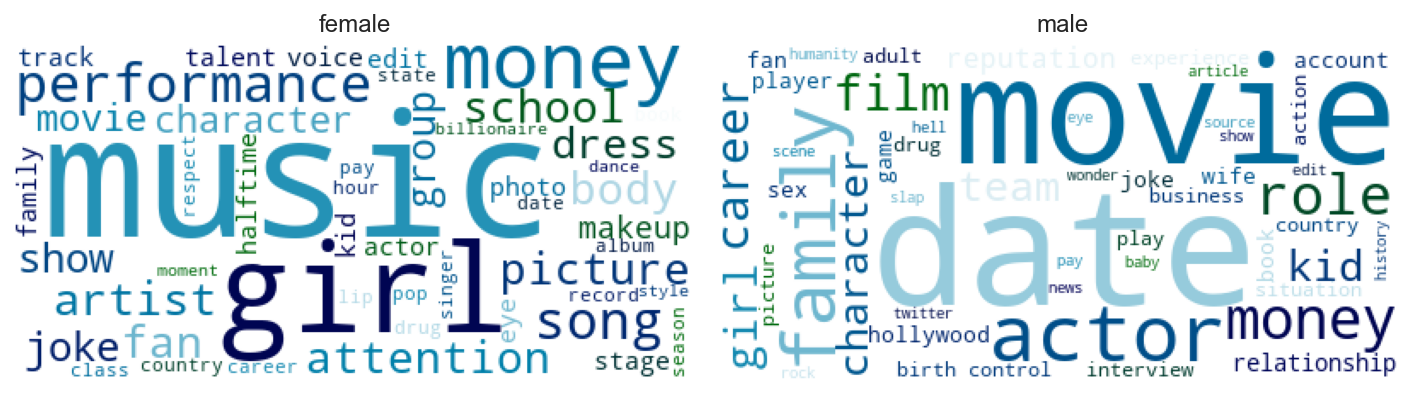

In [26]:
generate_wordcloud('adjectives')
generate_wordcloud('nouns')

In [27]:
female_adjective = " ".join(data[data.gender == 'female']['adjectives'].values)
male_adjective = " ".join(data[data.gender == 'male']['adjectives'].values)

In [28]:
def popular_words_count(text, words):
    counts = []
    for word in words:
        counts.append(text.count(word))
    return counts 

In [29]:
interesting_words = ['beautiful', 'hot', 'sexy', 'fit', 'fat','skinny', 'fake', 'natural', 'ugly',
                     'succesful', 'smart',  'strong', 'cool', 'brave', 'charming', 'charismatic',
                     'professional', 'intelligent', 'pure']

In [30]:
female_counts = popular_words_count(female_adjective, interesting_words)

In [31]:
male_counts = popular_words_count(male_adjective, interesting_words)

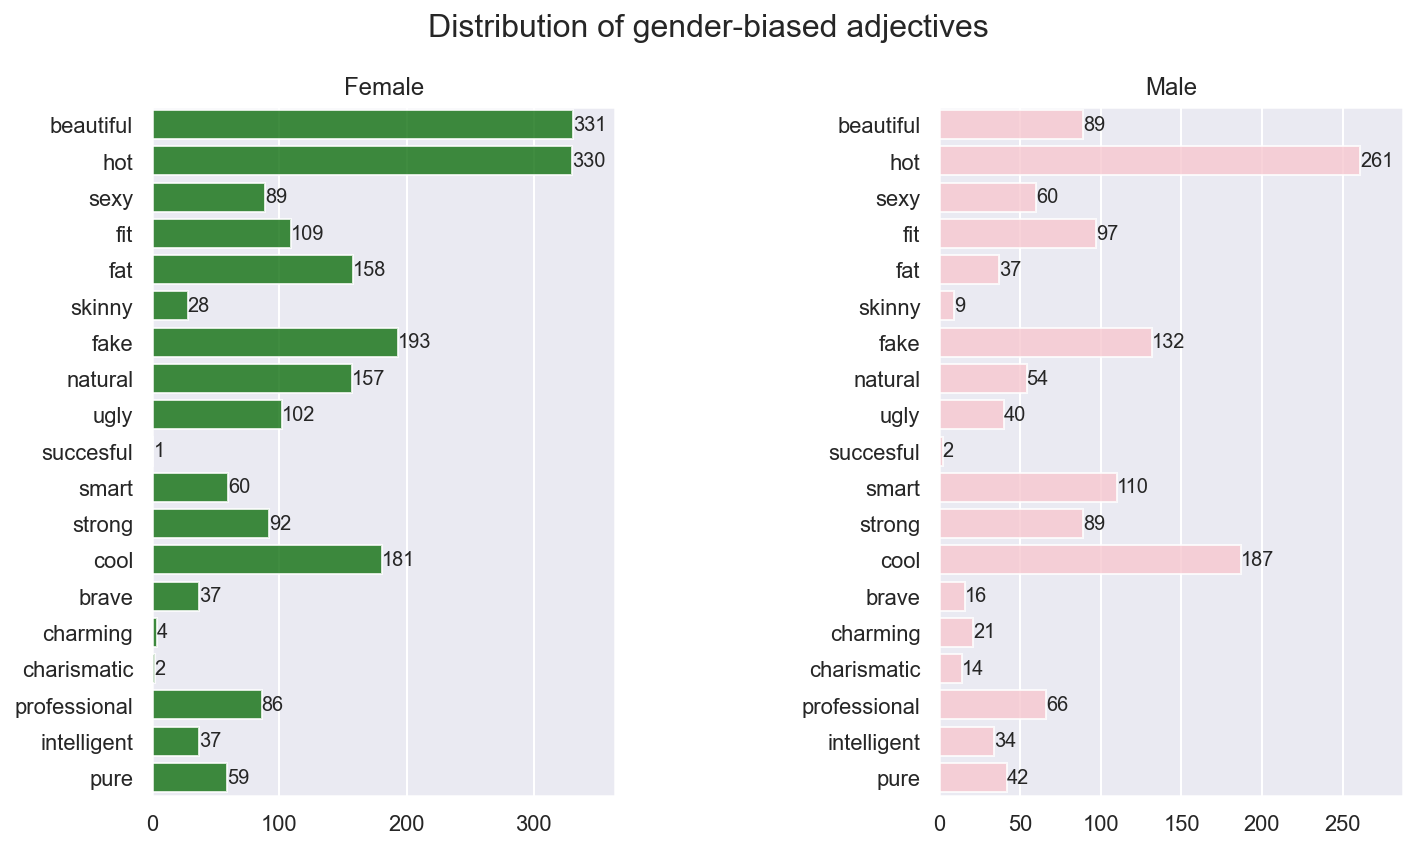

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

for ax, counts, gender in zip(axs, [female_counts, male_counts], ['Female', 'Male']):
    sns.barplot(x=counts, y=interesting_words, color='pink' if gender == 'Male' else 'green', alpha=0.8, ax=ax)
    ax.set_title(gender)
    ax.set_xmargin(0.1)
    for i, count in enumerate(counts):
        ax.text(count, i, str(count), ha='left', va='center', fontsize=10)  
fig.suptitle('Distribution of gender-biased adjectives', fontsize=16)
fig.tight_layout()
plt.subplots_adjust(wspace=0.7)
plt.show() 

In [37]:
interesting_nouns = ['boob', 'dick', 'muscle','career', 'body', 'personality', 'slut','whore', 'power',
                     'influence', 'belly', 'butt', 'skin', 'gay', 'lesbian']

In [38]:
female_nouns = " ".join(data[data.gender == 'female']['nouns'].values)
male_nouns = " ".join(data[data.gender == 'male']['nouns'].values)

In [39]:
female_counts_nouns = popular_words_count(female_nouns, interesting_nouns)
male_counts_nouns = popular_words_count(male_nouns, interesting_nouns)

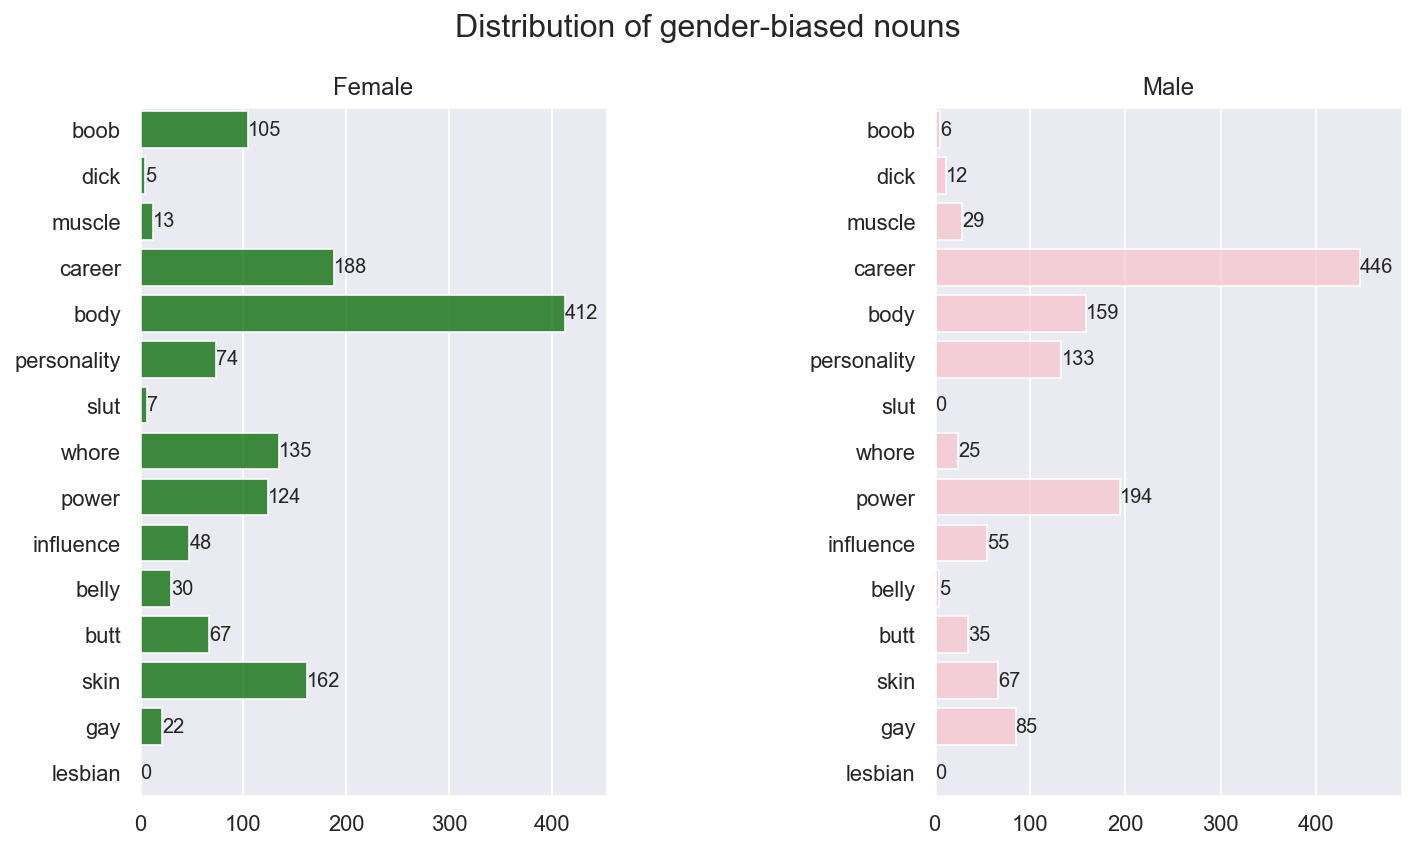

In [40]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

for ax, counts, gender in zip(axs, [female_counts_nouns, male_counts_nouns], ['Female', 'Male']):
    sns.barplot(x=counts, y=interesting_nouns, color='pink' if gender == 'Male' else 'green', alpha=0.8, ax=ax)
    ax.set_title(gender)
    ax.set_xmargin(0.1)
    for i, count in enumerate(counts):
        ax.text(count, i, str(count), ha='left', va='center', fontsize=10)

fig.suptitle('Distribution of gender-biased nouns', fontsize=16)
fig.tight_layout()
plt.subplots_adjust(wspace=0.7)
plt.show() 